# Convolutional Neural Network To Classify Images Of CIFAR-10 Dataset

Using CIFAR-10 Dataset.

Classes:
0= airplane 
1= automobile 
2= bird 
3= cat 
4= deer 
5= dog 
6= frog 
7= horse 
8= ship 
9= truck

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [8]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

Text(0.5, 1.0, 'Class [9]')

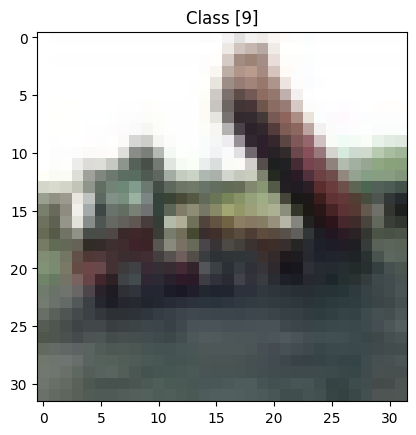

In [10]:
plt.imshow(x_train[2])
plt.title('Class ' + str(y_train[2]))

In [11]:
x_train = x_train.astype('float32')
x_train /= 255 # normalizing the data

x_test = x_test.astype('float32')
x_test /= 255 # normalizing the data

In [12]:
# class -> one-hot representation
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [21]:
model = Sequential()

model.add(InputLayer(shape= (32, 32, 3)))

model.add(Conv2D(filters= 64, kernel_size= (3, 3), activation= 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters= 64, kernel_size= (3, 3), activation= 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Flatten())

model.add(Dense(units= 128, activation= 'relu'))
model.add(Dropout(rate= 0.2))

model.add(Dense(units= 128, activation= 'relu'))
model.add(Dropout(rate= 0.2))

model.add(Dense(units= 10, activation= 'softmax'))

In [22]:
model.compile(loss= 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics= ['accuracy'])

In [23]:
model.fit(
    x_train,
    y_train,
    epochs= 10,
    batch_size= 128,
    validation_data = (x_test, y_test)
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 201ms/step - accuracy: 0.3295 - loss: 1.9942 - val_accuracy: 0.1008 - val_loss: 12.4182
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 205ms/step - accuracy: 0.5652 - loss: 1.2399 - val_accuracy: 0.6031 - val_loss: 1.1557
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 209ms/step - accuracy: 0.6617 - loss: 0.9777 - val_accuracy: 0.6445 - val_loss: 1.0581
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 209ms/step - accuracy: 0.7180 - loss: 0.8189 - val_accuracy: 0.6676 - val_loss: 0.9795
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 208ms/step - accuracy: 0.7600 - loss: 0.6987 - val_accuracy: 0.6476 - val_loss: 1.0358
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 205ms/step - accuracy: 0.7932 - loss: 0.5948 - val_accuracy: 0.6549 - val_loss: 1.0306
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 200ms/step - accuracy: 0.8247 - loss: 0.5139 - val_accuracy: 0.6752 - val_loss: 0.9904
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 200ms/step - accuracy: 0.8499 - loss: 